In [1]:
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    path = '/Library/Fonts/Arial Unicode.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~~~')

print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [2]:
train = pd.read_csv('dataset/train.csv')

In [3]:
train.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수']

In [4]:
# train = train.rename(columns={"단지코드" : "code",
#                      "총세대수" : "house_count",
#                      "임대건물구분" : "leasable_area_cat",
#                      "지역" : "district",
#                      "공급유형" : "supply_type",
#                      "전용면적" : "net_leasable_area",
#                      "전용면적별세대수" : "net_leasable_area_count",
#                      "공가수" : "empty_house",
#                      "신분" : "category",
#                      "임대보증금" : "rent_deposit",
#                      "임대료" : "rent",
#                      "지하철" : "subway",
#                      "버스" : "bus",
#                      "단지내주차면수" : "parking_area",
#                      "등록차량수" : "cars"})

In [5]:
error_code = ['C2085', 'C1397', 'C2431','C1649','C1036','C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988'] 

In [6]:
new_train = train[~train['단지코드'].isin(error_code)]

In [7]:
new_train['임대보증금'] = new_train['임대보증금'].replace('-', np.nan).astype(float)

In [8]:
new_train['임대료'] = new_train['임대료'].replace('-', np.nan).astype(float)

In [9]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2869 non-null   object 
 1   총세대수      2869 non-null   int64  
 2   임대건물구분    2869 non-null   object 
 3   지역        2869 non-null   object 
 4   공급유형      2869 non-null   object 
 5   전용면적      2869 non-null   float64
 6   전용면적별세대수  2869 non-null   int64  
 7   공가수       2869 non-null   float64
 8   신분        2869 non-null   object 
 9   임대보증금     2288 non-null   float64
 10  임대료       2285 non-null   float64
 11  지하철       2662 non-null   float64
 12  버스        2869 non-null   float64
 13  단지내주차면수   2869 non-null   float64
 14  등록차량수     2869 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 358.6+ KB


In [10]:
new_train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       581
임대료         584
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [11]:
new_train['공급유형'].unique()

array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
       '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object)

In [12]:
new_train['전용면적'] = new_train['전용면적']//5*5

In [13]:
new_train[new_train['임대보증금'].isna()==True]['공급유형'].unique()

array(['임대상가', '공공분양', '국민임대', '행복주택'], dtype=object)

In [14]:
px.scatter(new_train, x='지역', y='임대보증금', color='신분')

In [15]:
px.scatter(new_train, x='신분', y='임대보증금', color='신분')

In [16]:
px.scatter(new_train, x='임대보증금', y='임대료', color='지역')

In [17]:
# 지하철 결측치 채우기

In [18]:
px.scatter(new_train, x='지역', y='지하철', color='지역')

In [19]:
new_train[new_train['지하철'].isna()==True]['지역'].unique()

array(['충청남도', '대전광역시'], dtype=object)

In [20]:
temp = new_train.copy()
region_list = ['충청남도', '대전광역시']

In [21]:
for idx, i  in enumerate(region_list):
    new_train.loc[(new_train['지역'] == i) & (new_train['지하철'].isna()==True), '지하철'] = temp[temp['지역'] == i]['지하철'].mean()

In [22]:
px.scatter(new_train, x='지역', y='지하철', color='지역')

In [23]:
# 임대보증금, 임대료 결측치 처리

In [24]:
new_train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       581
임대료         584
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [25]:
# 임대보증금과 임대료 회귀분석으로 값 채우기

In [26]:
temp = new_train.copy()

In [27]:
# categorical feature labeling
local_map = {}
var_list = ['단지코드', '임대건물구분', '지역', '공급유형', '신분']
for idx, var in enumerate(var_list):
    for i, loc in enumerate(temp[var].unique()):
        local_map[loc] = i
        
    temp[var] = temp[var].map(local_map)

In [28]:
local_map

{'C2515': 0,
 'C1407': 1,
 'C1945': 2,
 'C1470': 3,
 'C1898': 4,
 'C1244': 5,
 'C1171': 6,
 'C2073': 7,
 'C2513': 8,
 'C1936': 9,
 'C2049': 10,
 'C2202': 11,
 'C1925': 12,
 'C2576': 13,
 'C1312': 14,
 'C1874': 15,
 'C2650': 16,
 'C2416': 17,
 'C2013': 18,
 'C1424': 19,
 'C2100': 20,
 'C2621': 21,
 'C2520': 22,
 'C2319': 23,
 'C1616': 24,
 'C1704': 25,
 'C2258': 26,
 'C1032': 27,
 'C2038': 28,
 'C1859': 29,
 'C1722': 30,
 'C1850': 31,
 'C2190': 32,
 'C1476': 33,
 'C1077': 34,
 'C1068': 35,
 'C1983': 36,
 'C2135': 37,
 'C2034': 38,
 'C1109': 39,
 'C1497': 40,
 'C2289': 41,
 'C2597': 42,
 'C2310': 43,
 'C1672': 44,
 'C2132': 45,
 'C1439': 46,
 'C1613': 47,
 'C2216': 48,
 'C1899': 49,
 'C1056': 50,
 'C2644': 51,
 'C1206': 52,
 'C2481': 53,
 'C1718': 54,
 'C1655': 55,
 'C1430': 56,
 'C1775': 57,
 'C1519': 58,
 'C2221': 59,
 'C1790': 60,
 'C2109': 61,
 'C1698': 62,
 'C1866': 63,
 'C1005': 64,
 'C1004': 65,
 'C1875': 66,
 'C2156': 67,
 'C2212': 68,
 'C2401': 69,
 'C2571': 70,
 'C1175': 71,
 '

In [29]:
# 아파트
# 임대보증금

In [30]:
not_null_deposit = temp[(temp['임대건물구분'] == 0) & (temp['임대보증금'].isna() == False)]

In [31]:
null_deposit = temp[(temp['임대건물구분'] == 0) & (temp['임대보증금'].isna() == True)]

In [32]:
X = not_null_deposit.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], axis=1)
y = not_null_deposit['임대보증금']

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [35]:
lr.score(X, y)

0.469571269027485

In [36]:
y_hat = lr.predict(X)

In [37]:
np.sqrt(((y_hat - y) ** 2).mean())

14240904.729933232

In [38]:
null_X = null_deposit.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], 1)

In [39]:
null_predict = lr.predict(null_X)

In [40]:
deposit = null_X.copy()

In [41]:
deposit['임대보증금'] = null_predict

In [42]:
deposit

단지코드  총세대수  지역  공급유형  전용면적  전용면적별세대수   공가수  신분       지하철   버스  단지내주차면수  \
2331   313  1401   1     7  70.0       317   2.0   3  0.722543  6.0   1636.0   
2332   313  1401   1     7  70.0       137   2.0   3  0.722543  6.0   1636.0   
2333   313  1401   1     7  70.0        22   2.0   3  0.722543  6.0   1636.0   
2334   313  1401   1     7  80.0       164   2.0   3  0.722543  6.0   1636.0   
2335   313  1401   1     7  80.0        19   2.0   3  0.722543  6.0   1636.0   
2336   313  1401   1     7  80.0        26   2.0   3  0.722543  6.0   1636.0   
2337   313  1401   1     7  80.0        26   2.0   3  0.722543  6.0   1636.0   
2547   348  1934   7     0  20.0       472  43.0   7  0.000000  4.0   1670.0   
2548   348  1934   7     0  20.0       104  43.0   7  0.000000  4.0   1670.0   
2549   348  1934   7     0  25.0       590  43.0   7  0.000000  4.0   1670.0   
2550   348  1934   7     0  35.0       464  43.0   7  0.000000  4.0   1670.0   
2551   348  1934   7     0  45.0       304  43.0   7  0.000000  4.0   1670.0   
2680   367   480   4     8  15.0       156  25.0  10  0.000000  3.0    338.0   
2681   367   480   4     8  25.0       136  25.0  10  0.000000  3.0    338.0   
2682   367   480   4     8  25.0        72  25.0  10  0.000000  3.0    338.0   
2683   367   480   4     8  25.0        24  25.0  10  0.000000  3.0    338.0   
2906   403   924  13     0  25.0       238   0.0   7  0.000000  8.0    664.0   
2907   403   924  13     0  25.0        38   0.0   7  0.000000  8.0    664.0   
2908   403   924  13     0  35.0       220   0.0   7  0.000000  8.0    664.0   

             임대보증금  
2331  7.539560e+07  
2332  7.664625e+07  
2333  7.744528e+07  
2334  8.658640e+07  
2335  8.759388e+07  
2336  8.754524e+07  
2337  8.754524e+07  
2547  1.663035e+07  
2548  1.918725e+07  
2549  2.087436e+07  
2550  3.187757e+07  
2551  4.311701e+07  
2680  2.124794e+07  
2681  3.151465e+07  
2682  3.195933e+07  
2683  3.229283e+07  
2906  1.730051e+07  
2907  1.869013e+07  
2908  2.755333e+07

In [43]:
# deposit = deposit.rename(columns={"단지코드" : "code",
#                      "총세대수" : "house_count",
#                      "임대건물구분" : "leasable_area_cat",
#                      "지역" : "district",
#                      "공급유형" : "supply_type",
#                      "전용면적" : "net_leasable_area",
#                      "전용면적별세대수" : "net_leasable_area_count",
#                      "공가수" : "empty_house",
#                      "신분" : "category",
#                      "임대보증금" : "rent_deposit",
#                      "임대료" : "rent",
#                      "지하철" : "subway",
#                      "버스" : "bus",
#                      "단지내주차면수" : "parking_area",
#                      "등록차량수" : "cars"})

In [44]:
# temp = temp.rename(columns={"단지코드" : "code",
#                      "총세대수" : "house_count",
#                      "임대건물구분" : "leasable_area_cat",
#                      "지역" : "district",
#                      "공급유형" : "supply_type",
#                      "전용면적" : "net_leasable_area",
#                      "전용면적별세대수" : "net_leasable_area_count",
#                      "공가수" : "empty_house",
#                      "신분" : "category",
#                      "임대보증금" : "rent_deposit",
#                      "임대료" : "rent",
#                      "지하철" : "subway",
#                      "버스" : "bus",
#                      "단지내주차면수" : "parking_area",
#                      "등록차량수" : "cars"})

In [45]:
deposit['임대보증금']

2331    7.539560e+07
2332    7.664625e+07
2333    7.744528e+07
2334    8.658640e+07
2335    8.759388e+07
2336    8.754524e+07
2337    8.754524e+07
2547    1.663035e+07
2548    1.918725e+07
2549    2.087436e+07
2550    3.187757e+07
2551    4.311701e+07
2680    2.124794e+07
2681    3.151465e+07
2682    3.195933e+07
2683    3.229283e+07
2906    1.730051e+07
2907    1.869013e+07
2908    2.755333e+07
Name: 임대보증금, dtype: float64

In [46]:
temp['임대보증금'].loc[deposit.index] = deposit['임대보증금']

In [47]:
temp

단지코드  총세대수  임대건물구분  지역  공급유형  전용면적  전용면적별세대수   공가수  신분       임대보증금  \
8        0   545       0   0     0  30.0       276  17.0   0   9216000.0   
9        0   545       0   0     0  35.0        60  17.0   0  12672000.0   
10       0   545       0   0     0  35.0        20  17.0   0  12672000.0   
11       0   545       0   0     0  45.0        38  17.0   0  18433000.0   
12       0   545       0   0     0  45.0        19  17.0   0  18433000.0   
...    ...   ...     ...  ..   ...   ...       ...   ...  ..         ...   
2947   410   239       0   4     0  45.0        19   7.0   0  11346000.0   
2948   410   239       0   4     0  50.0        34   7.0   0  14005000.0   
2949   410   239       0   4     0  50.0        34   7.0   0  14005000.0   
2950   410   239       0   4     0  50.0       114   7.0   0  14005000.0   
2951   410   239       0   4     0  50.0        19   7.0   0  14830000.0   

           임대료  지하철   버스  단지내주차면수  등록차량수  
8      82940.0  0.0  3.0    624.0  205.0  
9     107130.0  0.0  3.0    624.0  205.0  
10    107130.0  0.0  3.0    624.0  205.0  
11    149760.0  0.0  3.0    624.0  205.0  
12    149760.0  0.0  3.0    624.0  205.0  
...        ...  ...  ...      ...    ...  
2947  116090.0  0.0  1.0    166.0  146.0  
2948  142310.0  0.0  1.0    166.0  146.0  
2949  142310.0  0.0  1.0    166.0  146.0  
2950  142310.0  0.0  1.0    166.0  146.0  
2951  151030.0  0.0  1.0    166.0  146.0  

[2869 rows x 15 columns]

In [48]:
# temp2[(temp2['leasable_area_cat'] == 0)&(temp2['rent_deposit'].isna() == True)]

In [49]:
# 임대료

In [50]:
not_null_rent = temp[(temp['임대건물구분'] == 0) & (temp['임대료'].isna() == False)]

In [51]:
null_rent = temp[(temp['임대건물구분'] == 0) & (temp['임대료'].isna() == True)]

In [52]:
X = not_null_rent.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], axis=1)
y = not_null_rent['임대료']

In [53]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.6908740814964134

In [54]:
y_hat = lr.predict(X)
np.sqrt(((y_hat - y) ** 2).mean())

69763.20055042396

In [55]:
null_X = null_rent.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], 1)

In [56]:
null_predict = lr.predict(null_X)

In [57]:
rent = null_X.copy()

In [58]:
rent['임대료'] = null_predict

In [59]:
rent

단지코드  총세대수  지역  공급유형  전용면적  전용면적별세대수   공가수  신분       지하철   버스  단지내주차면수  \
2100   277   790  14     6  50.0       126  13.0   0  0.000000  3.0    673.0   
2101   277   790  14     6  55.0        49  13.0   0  0.000000  3.0    673.0   
2102   277   790  14     6  55.0        75  13.0   0  0.000000  3.0    673.0   
2331   313  1401   1     7  70.0       317   2.0   3  0.722543  6.0   1636.0   
2332   313  1401   1     7  70.0       137   2.0   3  0.722543  6.0   1636.0   
2333   313  1401   1     7  70.0        22   2.0   3  0.722543  6.0   1636.0   
2334   313  1401   1     7  80.0       164   2.0   3  0.722543  6.0   1636.0   
2335   313  1401   1     7  80.0        19   2.0   3  0.722543  6.0   1636.0   
2336   313  1401   1     7  80.0        26   2.0   3  0.722543  6.0   1636.0   
2337   313  1401   1     7  80.0        26   2.0   3  0.722543  6.0   1636.0   
2547   348  1934   7     0  20.0       472  43.0   7  0.000000  4.0   1670.0   
2548   348  1934   7     0  20.0       104  43.0   7  0.000000  4.0   1670.0   
2549   348  1934   7     0  25.0       590  43.0   7  0.000000  4.0   1670.0   
2550   348  1934   7     0  35.0       464  43.0   7  0.000000  4.0   1670.0   
2551   348  1934   7     0  45.0       304  43.0   7  0.000000  4.0   1670.0   
2680   367   480   4     8  15.0       156  25.0  10  0.000000  3.0    338.0   
2681   367   480   4     8  25.0       136  25.0  10  0.000000  3.0    338.0   
2682   367   480   4     8  25.0        72  25.0  10  0.000000  3.0    338.0   
2683   367   480   4     8  25.0        24  25.0  10  0.000000  3.0    338.0   
2906   403   924  13     0  25.0       238   0.0   7  0.000000  8.0    664.0   
2907   403   924  13     0  25.0        38   0.0   7  0.000000  8.0    664.0   
2908   403   924  13     0  35.0       220   0.0   7  0.000000  8.0    664.0   

                임대료  
2100  337088.237826  
2101  370653.025834  
2102  371087.481365  
2331  598842.134830  
2332  595834.365766  
2333  593912.735531  
2334  665988.420673  
2335  663565.495594  
2336  663682.464391  
2337  663682.464391  
2547   51534.995977  
2548   45385.779225  
2549   88358.200471  
2550  155955.651674  
2551  222984.968720  
2680   53829.480454  
2681  123198.173439  
2682  122128.744439  
2683  121326.672689  
2906  134517.919917  
2907  131175.954291  
2908  203920.032558

In [60]:
# rent = rent.rename(columns={"단지코드" : "code",
#                      "총세대수" : "house_count",
#                      "임대건물구분" : "leasable_area_cat",
#                      "지역" : "district",
#                      "공급유형" : "supply_type",
#                      "전용면적" : "net_leasable_area",
#                      "전용면적별세대수" : "net_leasable_area_count",
#                      "공가수" : "empty_house",
#                      "신분" : "category",
#                      "임대보증금" : "rent_deposit",
#                      "임대료" : "rent",
#                      "지하철" : "subway",
#                      "버스" : "bus",
#                      "단지내주차면수" : "parking_area",
#                      "등록차량수" : "cars"})

In [61]:
temp['임대료'].loc[rent.index] = rent['임대료']

In [62]:
temp.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       562
임대료         562
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [63]:
# 상가 

In [64]:
rent_retail = pd.read_csv("dataset/rent_retail.csv", encoding = "cp949")

In [65]:
rent_retail.head(5)

모집구분       관리소명                          모집공고명       모집공고일      당첨자발표일  \
0  임대상가  의정부장암1관리소   의정부장암1단지 임대상가 202호 입점자 모집 공고  2020-01-09  2020-01-16   
1  임대상가   대구안심1관리소  대구안심1단지 임대상가 입점자 모집공고(상가 지하호)  2020-01-13  2020-01-28   
2  임대상가    서울우면관리소   서울우면단지 임대상가 입점자 모집 재공고(105호)  2020-01-13  2020-01-21   
3  임대상가   순천조례5관리소            순천조례5 임대상가 입점자 모집공고  2020-01-13  2020-01-29   
4  임대상가   순천조례5관리소            순천조례5 임대상가 입점자 모집공고  2020-01-13  2020-01-29   

           문의전화    전용면적  모집호수     계약금        잔금    월임대료   
0  031-871-1057   54.51     1  2686200  10744800  313420  
1  053-964-4548  126.65     1  2274000   9096000  423290  
2   02-578-0503   32.10     1  5459000  21836000  584030  
3  061-721-1643   33.31     1  1763000   7052000  244870  
4  061-721-1643   33.15     1  1666000   6668000  231500

In [66]:
new_train.head(5)

단지코드  총세대수 임대건물구분    지역  공급유형  전용면적  전용면적별세대수   공가수 신분       임대보증금  \
8   C2515   545    아파트  경상남도  국민임대  30.0       276  17.0  A   9216000.0   
9   C2515   545    아파트  경상남도  국민임대  35.0        60  17.0  A  12672000.0   
10  C2515   545    아파트  경상남도  국민임대  35.0        20  17.0  A  12672000.0   
11  C2515   545    아파트  경상남도  국민임대  45.0        38  17.0  A  18433000.0   
12  C2515   545    아파트  경상남도  국민임대  45.0        19  17.0  A  18433000.0   

         임대료  지하철   버스  단지내주차면수  등록차량수  
8    82940.0  0.0  3.0    624.0  205.0  
9   107130.0  0.0  3.0    624.0  205.0  
10  107130.0  0.0  3.0    624.0  205.0  
11  149760.0  0.0  3.0    624.0  205.0  
12  149760.0  0.0  3.0    624.0  205.0

In [67]:
new_train['지역'].unique()

array(['경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [68]:
rent_retail["관리소명"].unique()

array(['의정부장암1관리소', '대구안심1관리소', '서울우면관리소', '순천조례5관리소', '대구본동관리소',
       '서울번동2관리소', '보령명천2관리소', '대전판암4관리소', '진해자은관리소', '대전둔산1관리소',
       '공주옥룡1관리소', '천안성정4관리소', '대전법동3관리소', '광주하남1관리소', '안동옥동2관리소',
       '서울대방1관리소', '인천연수1관리소', '진주가좌1관리소', '인천만수7관리소', '청주산남2-1관리소',
       '군산나운4관리소', '전주평화1관리소', '분당목련1관리소', '부산모라3관리소', '서귀포동홍3관리소',
       '서울등촌1관리소', '대구월성3관리소', '여수문수1관리소', '부산덕천2관리소', '부산반송관리소',
       '남원노암관리소', '광주쌍촌관리소', '진주평거2관리소', '익산동산관리소', '대전산내관리소', '부산금곡4관리소',
       '목포상동1관리소', '광명하안13관리소', '청주산남2-2관리소', '인천삼산관리소', '수원우만3관리소',
       '산본주몽1관리소', '울산달동3관리소', '광주두암2관리소', '통영도남관리소', '포항학산관리소',
       '부산모라1관리소', '부산금곡1관리소', '영천야사4관리소', '영주가흥1관리소', '대구월성2관리소',
       '대구산격관리소', '충주연수2관리소', '대구안심3관리소', '목포상동3관리소', '안산군자13관리소',
       '광주오치1관리소', '마산중리1관리소', '대구성서1관리소', '구미황상3관리소', '부천춘의관리소',
       '김해구산1관리소', '부산금곡2관리소', '원주명륜2관리소'], dtype=object)

In [69]:
# 경상남도 : 진해, 진주, 통영, 마산, 김해, 부산, 
# 대전광역시 : 대전
# 경기도 : 의정부, 인천, 분당, 광명, 수원, 산본, 안산, 부천
# 전라북도 : 남원, 익산,  
# 강원도 : 원주
# 광주광역시 : 광주
# 충청남도 : 보령, 공주, 천안
# 부산광역시 : 부산
# 제주특별자치도 : 서귀포
# 울산광역시 : 울산
# 충청북도 : 청주, 충주, 
# 전라남도 : 순천, 여수, 목포, 
# 경상북도 : 안동, 포항, 영천, 영주, 구미
# 대구광역시 : 대구, 
# 서울특별시 : 서울, 
# 세종특별자치시 :

In [70]:
# gyeongnam = ["진해", "진주", "통영", "마산", "김해", "부산"]
# daejeon = ["대전"]
# gyeonggi = ["의정부", "인천", "분당", "광명", "수원", "산본", "안산", "부천"]
# jeolbuk = ["남원", "익산"]
# gangwon = ["원주"]
# gwangju = ["광주"]
# chungnam = ["보령", "공주", "천안"]
# busan = ['부산']
# jeju = ['서귀포']
# ulsan = ['울산']
# chungbuk = ["청주", "충주"]
# jeolnam = ["순천", "여수", "목포",]
# gyeongbuk = ["안동", "포항", "영천", "영주", "구미"]
# daegu = ['대구']
# seoul = ['서울']"

In [71]:
rent_retail['지역'] = ""

In [72]:
area_dic = {
            "진해" : "경상남도",
            "진주" : "경상남도",
            "통영" : "경상남도",
            "마산" : "경상남도",
            "김해" : "경상남도",
            "부산" : "경상남도",
            "대전" : "대전광역시",
            "의정부" : "경기도",
            "인천" : "경기도", 
            "분당" : "경기도", 
            "광명" : "경기도", 
            "수원" : "경기도", 
            "산본" : "경기도", 
            "안산" : "경기도", 
            "부천" : "경기도",
            "남원" : "전라북도", 
            "익산" : "전라북도",  
            "군산" : "전라북도",
            "전주" : "전라북도",
            "원주" : "강원도",
            "광주" : "광주광역시",
            "보령" : "충청남도", 
            "공주" : "충청남도", 
            "천안" : "충청남도", 
            "부산" : "부산광역시",
            "서귀포" : "제주특별자치도",
            "울산" : "울산광역시",
            "청주" : "충청북도", 
            "충주" : "충청북도", 
            "순천" : "전라남도",
            "여수" : "전라남도", 
            "목포" : "전라남도", 
            "안동" : "경상북도", 
            "포항" : "경상북도", 
            "영천" : "경상북도", 
            "영주" : "경상북도", 
            "구미" : "경상북도",
            "대구" : "대구광역시",
            "서울" : "서울특별시"
            }

In [73]:
for key, val in area_dic.items():
    rent_retail['지역'].loc[rent_retail["관리소명"].str.contains(key)] = val

In [74]:
rent_retail['지역'].isnull().sum()

0

In [75]:
rent_retail.columns

Index(['모집구분', '관리소명', '모집공고명', '모집공고일', '당첨자발표일', '문의전화', '전용면적', '모집호수',
       ' 계약금 ', ' 잔금 ', ' 월임대료 ', '지역'],
      dtype='object')

In [76]:
rent_retail['임대보증금'] = rent_retail[' 계약금 '] + rent_retail[' 잔금 '] 

In [77]:
new_rent_retail = rent_retail[['전용면적', '임대보증금', ' 월임대료 ', '지역']]

In [78]:
new_rent_retail['전용면적'] = new_rent_retail['전용면적']//5*5

In [79]:
px.scatter(new_rent_retail, x='전용면적', y='임대보증금', color='지역')

In [80]:
var_dic = {
            '경상남도': 0,
            '대전광역시': 1,
            '경기도': 2,
            '전라북도': 3,
            '강원도': 4,
            '광주광역시': 5,
            '충청남도': 6,
            '부산광역시': 7,
            '제주특별자치도': 8,
            '울산광역시': 9,
            '충청북도': 10,
            '전라남도': 11,
            '경상북도': 12,
            '대구광역시': 13,
            '서울특별시': 14,
            '세종특별자치시': 15
            }

In [81]:
for key, val in var_dic.items():
    new_rent_retail['지역'].loc[new_rent_retail['지역'].str.contains(key, na=False)] = val

In [82]:
new_rent_retail['지역'].unique()

array([2, 13, 14, 11, 6, 1, 0, 5, 12, 10, 3, 7, 8, 9, 4], dtype=object)

In [93]:
new_rent_retail.head(5)

전용면적     임대보증금   월임대료   지역
0   50.0  13431000  313420   2
1  125.0  11370000  423290  13
2   30.0  27295000  584030  14
3   30.0   8815000  244870  11
4   30.0   8334000  231500  11

In [86]:
X = new_rent_retail.drop(['임대보증금', " 월임대료 "], 1)
y = new_rent_retail['임대보증금']

In [87]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [88]:
lr.score(X, y)

0.6370973165005848

In [89]:
y_hat = lr.predict(X)
np.sqrt(((y_hat - y) ** 2).mean())

5990304.499549153

In [94]:
deposit_null = temp[temp['임대보증금'].isna() == True]
deposit_null = deposit_null[['전용면적', '지역']]

In [96]:
y_pred = lr.predict(deposit_null)

In [98]:
deposit_null['임대보증금']= y_pred

In [101]:
temp['임대보증금'].loc[deposit_null.index] = deposit_null['임대보증금']

In [103]:
temp.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금         0
임대료         562
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [104]:
X = new_rent_retail.drop(['임대보증금', " 월임대료 "], 1)
y = new_rent_retail[' 월임대료 ']

In [105]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [106]:
lr.score(X, y)

0.6877621402438863

In [107]:
y_hat = lr.predict(X)
np.sqrt(((y_hat - y) ** 2).mean())

165872.95302231706

In [108]:
rent_null = temp[temp['임대료'].isna() == True]
rent_null = deposit_null[['전용면적', '지역']]

In [110]:
y_pred = lr.predict(rent_null)

In [111]:
rent_null['임대료']= y_pred

In [112]:
temp['임대료'].loc[rent_null.index] = rent_null['임대료']

In [114]:
temp.isnull().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
등록차량수       0
dtype: int64

In [115]:
final = temp

In [117]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2869 non-null   int64  
 1   총세대수      2869 non-null   int64  
 2   임대건물구분    2869 non-null   int64  
 3   지역        2869 non-null   int64  
 4   공급유형      2869 non-null   int64  
 5   전용면적      2869 non-null   float64
 6   전용면적별세대수  2869 non-null   int64  
 7   공가수       2869 non-null   float64
 8   신분        2869 non-null   int64  
 9   임대보증금     2869 non-null   float64
 10  임대료       2869 non-null   float64
 11  지하철       2869 non-null   float64
 12  버스        2869 non-null   float64
 13  단지내주차면수   2869 non-null   float64
 14  등록차량수     2869 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 423.2 KB


In [119]:
final

단지코드  총세대수  임대건물구분  지역  공급유형  전용면적  전용면적별세대수   공가수  신분       임대보증금  \
8        0   545       0   0     0  30.0       276  17.0   0   9216000.0   
9        0   545       0   0     0  35.0        60  17.0   0  12672000.0   
10       0   545       0   0     0  35.0        20  17.0   0  12672000.0   
11       0   545       0   0     0  45.0        38  17.0   0  18433000.0   
12       0   545       0   0     0  45.0        19  17.0   0  18433000.0   
...    ...   ...     ...  ..   ...   ...       ...   ...  ..         ...   
2947   410   239       0   4     0  45.0        19   7.0   0  11346000.0   
2948   410   239       0   4     0  50.0        34   7.0   0  14005000.0   
2949   410   239       0   4     0  50.0        34   7.0   0  14005000.0   
2950   410   239       0   4     0  50.0       114   7.0   0  14005000.0   
2951   410   239       0   4     0  50.0        19   7.0   0  14830000.0   

           임대료  지하철   버스  단지내주차면수  등록차량수  
8      82940.0  0.0  3.0    624.0  205.0  
9     107130.0  0.0  3.0    624.0  205.0  
10    107130.0  0.0  3.0    624.0  205.0  
11    149760.0  0.0  3.0    624.0  205.0  
12    149760.0  0.0  3.0    624.0  205.0  
...        ...  ...  ...      ...    ...  
2947  116090.0  0.0  1.0    166.0  146.0  
2948  142310.0  0.0  1.0    166.0  146.0  
2949  142310.0  0.0  1.0    166.0  146.0  
2950  142310.0  0.0  1.0    166.0  146.0  
2951  151030.0  0.0  1.0    166.0  146.0  

[2869 rows x 15 columns]

<AxesSubplot:xlabel='임대건물구분', ylabel='등록차량수'>

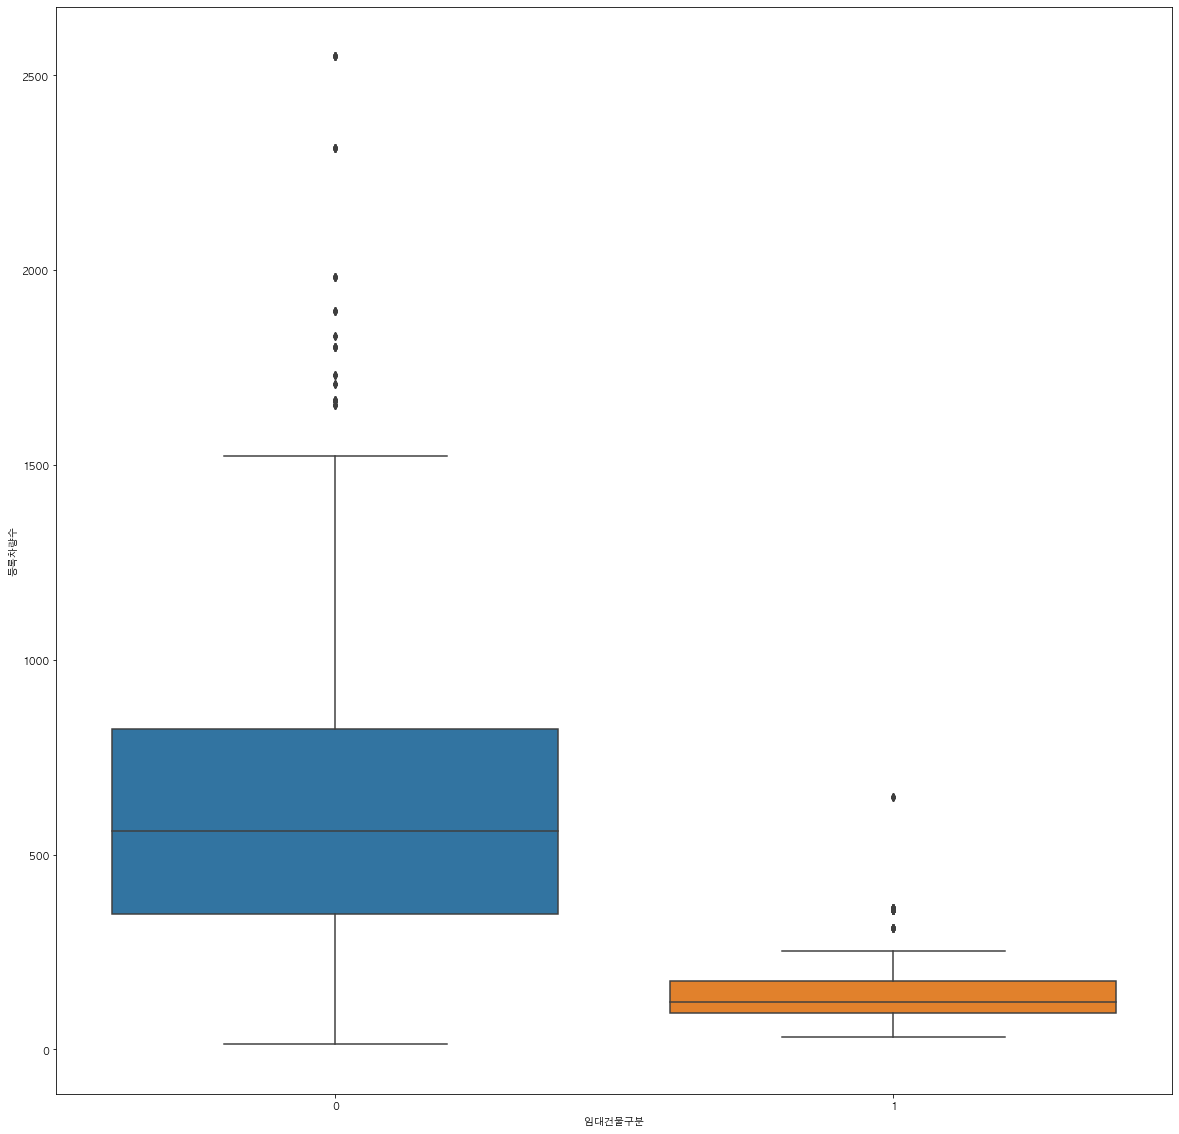

In [123]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = final['임대건물구분'], y = final['등록차량수'])

<AxesSubplot:xlabel='지역', ylabel='등록차량수'>

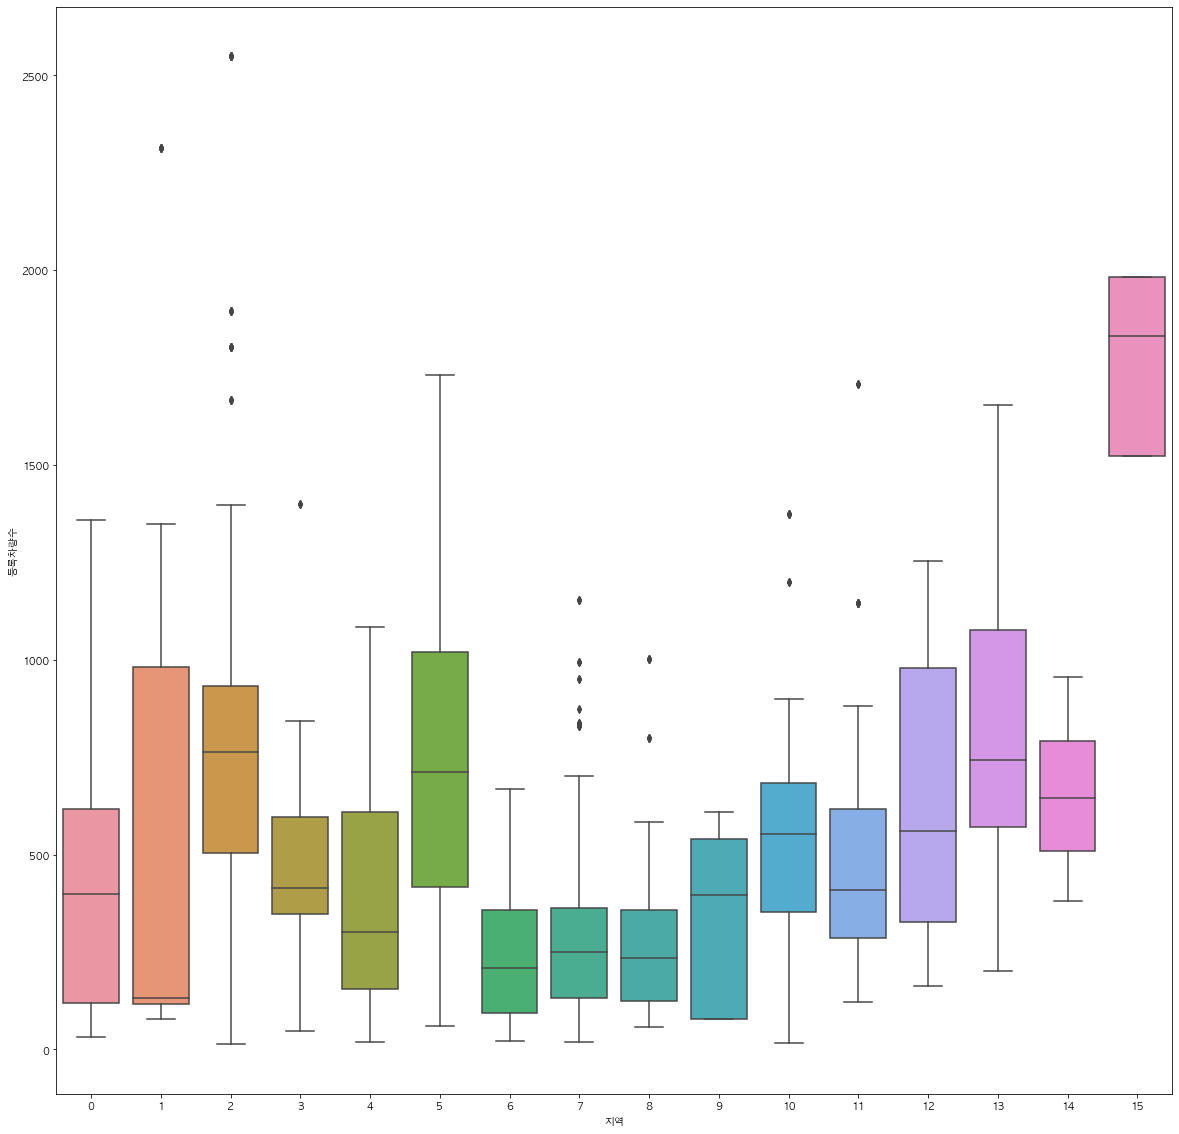

In [124]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = final['지역'], y = final['등록차량수'])

<AxesSubplot:xlabel='단지코드', ylabel='등록차량수'>

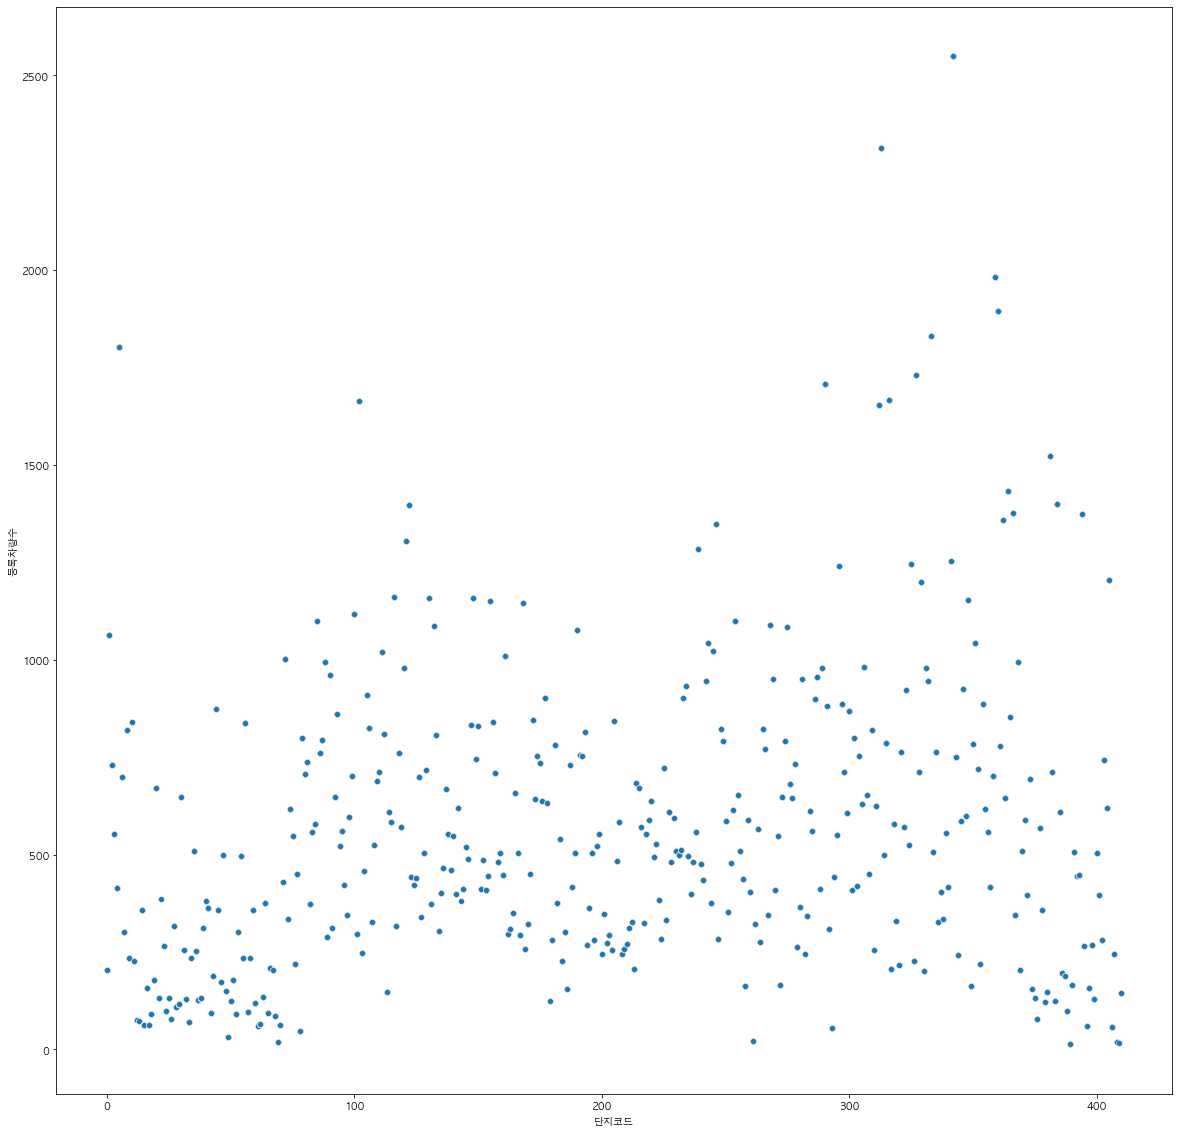

In [128]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['단지코드'], y = final['등록차량수'])

<AxesSubplot:xlabel='총세대수', ylabel='등록차량수'>

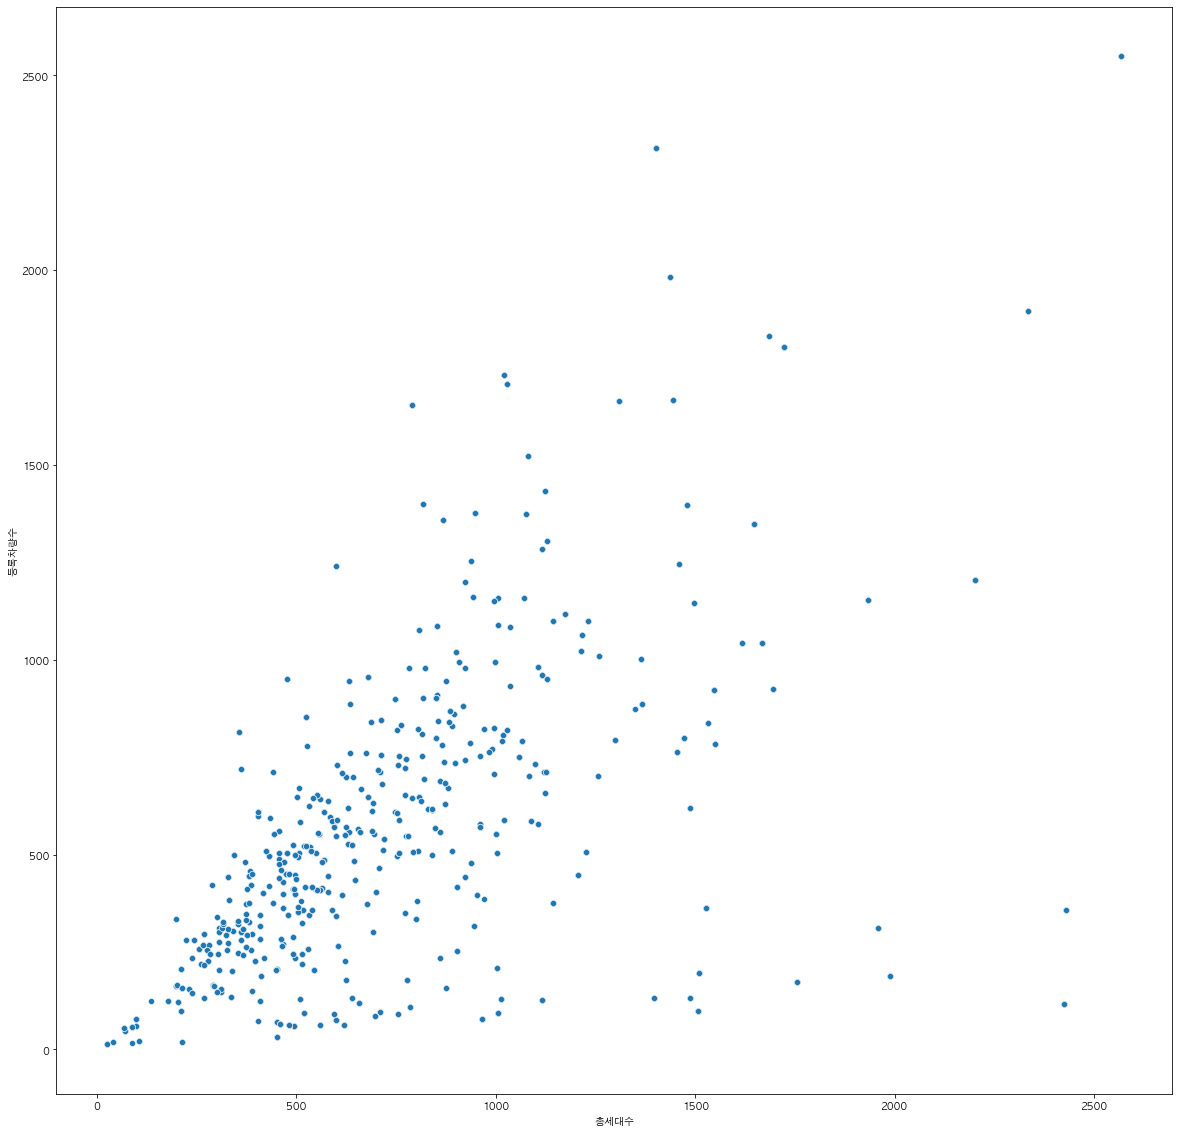

In [129]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['총세대수'], y = final['등록차량수'])

<AxesSubplot:xlabel='공급유형', ylabel='등록차량수'>

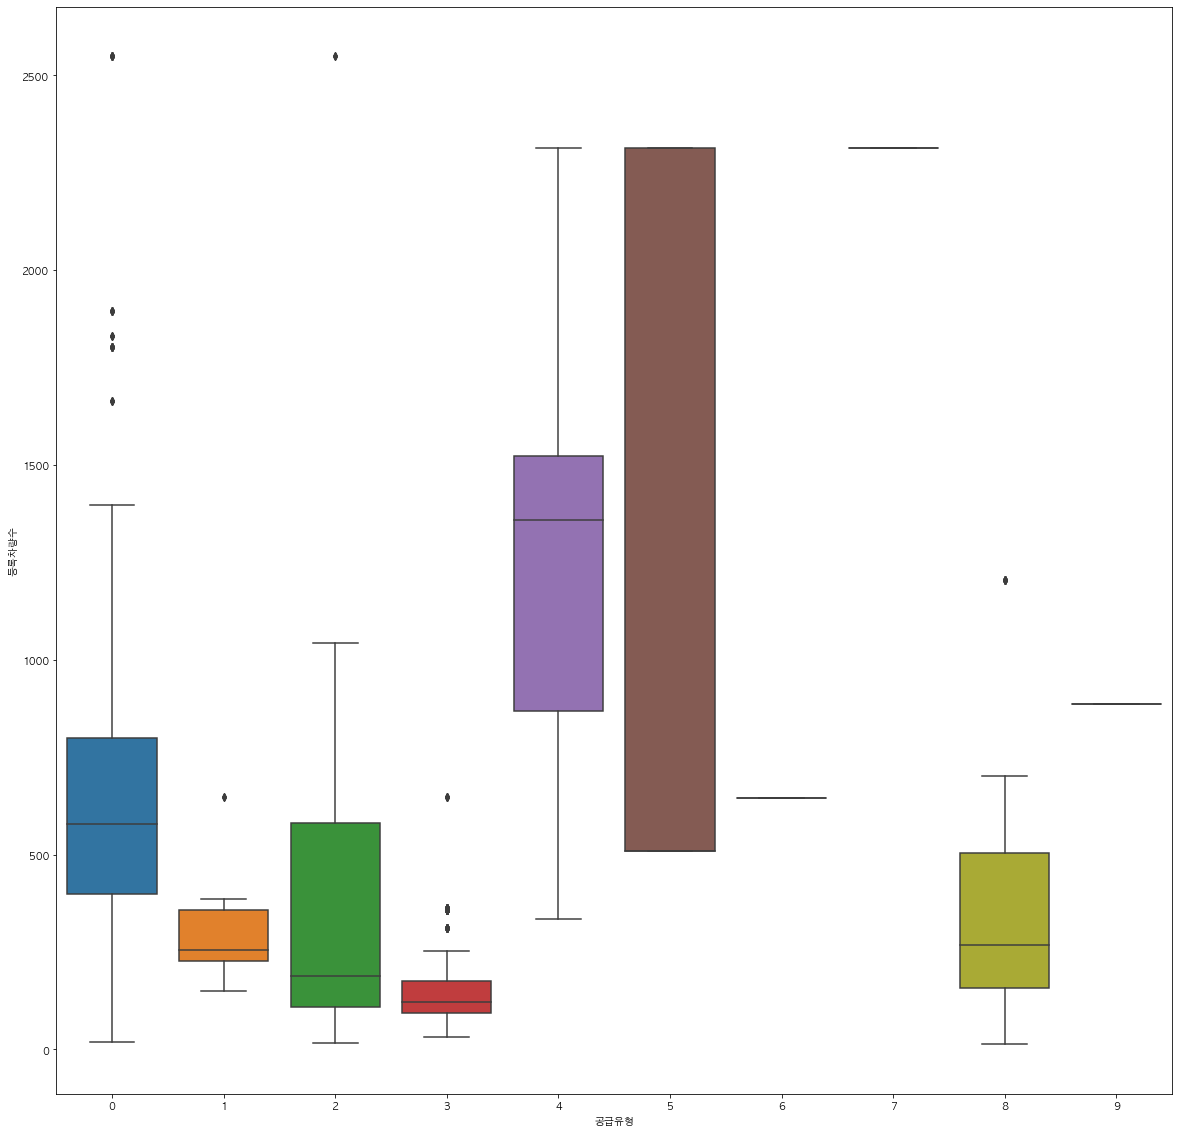

In [130]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = final['공급유형'], y = final['등록차량수'])

<AxesSubplot:xlabel='전용면적', ylabel='등록차량수'>

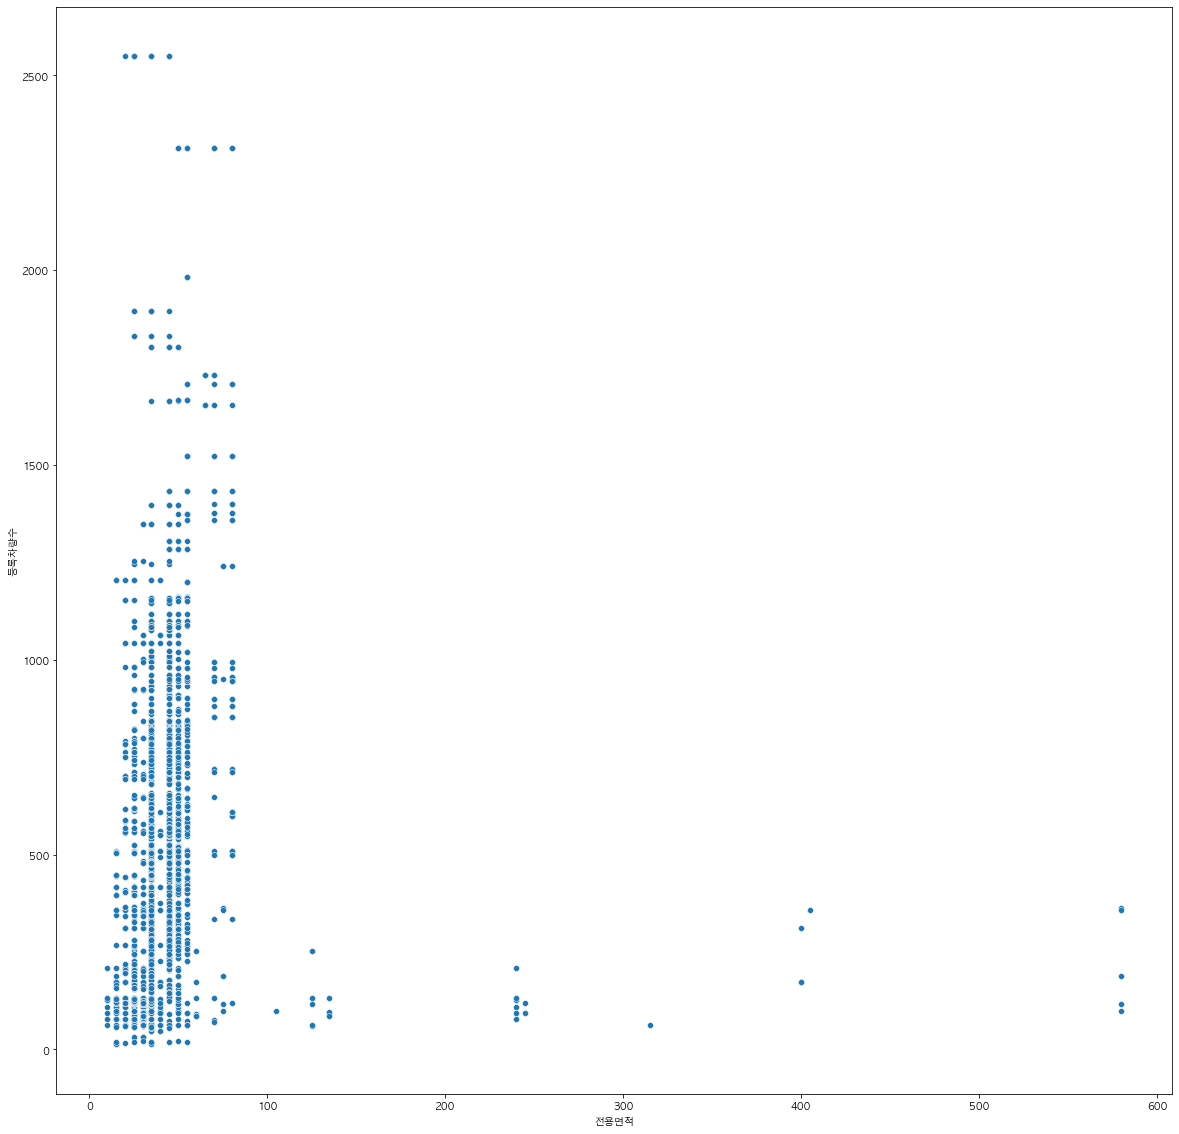

In [134]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['전용면적'], y = final['등록차량수'])

<AxesSubplot:xlabel='공가수', ylabel='등록차량수'>

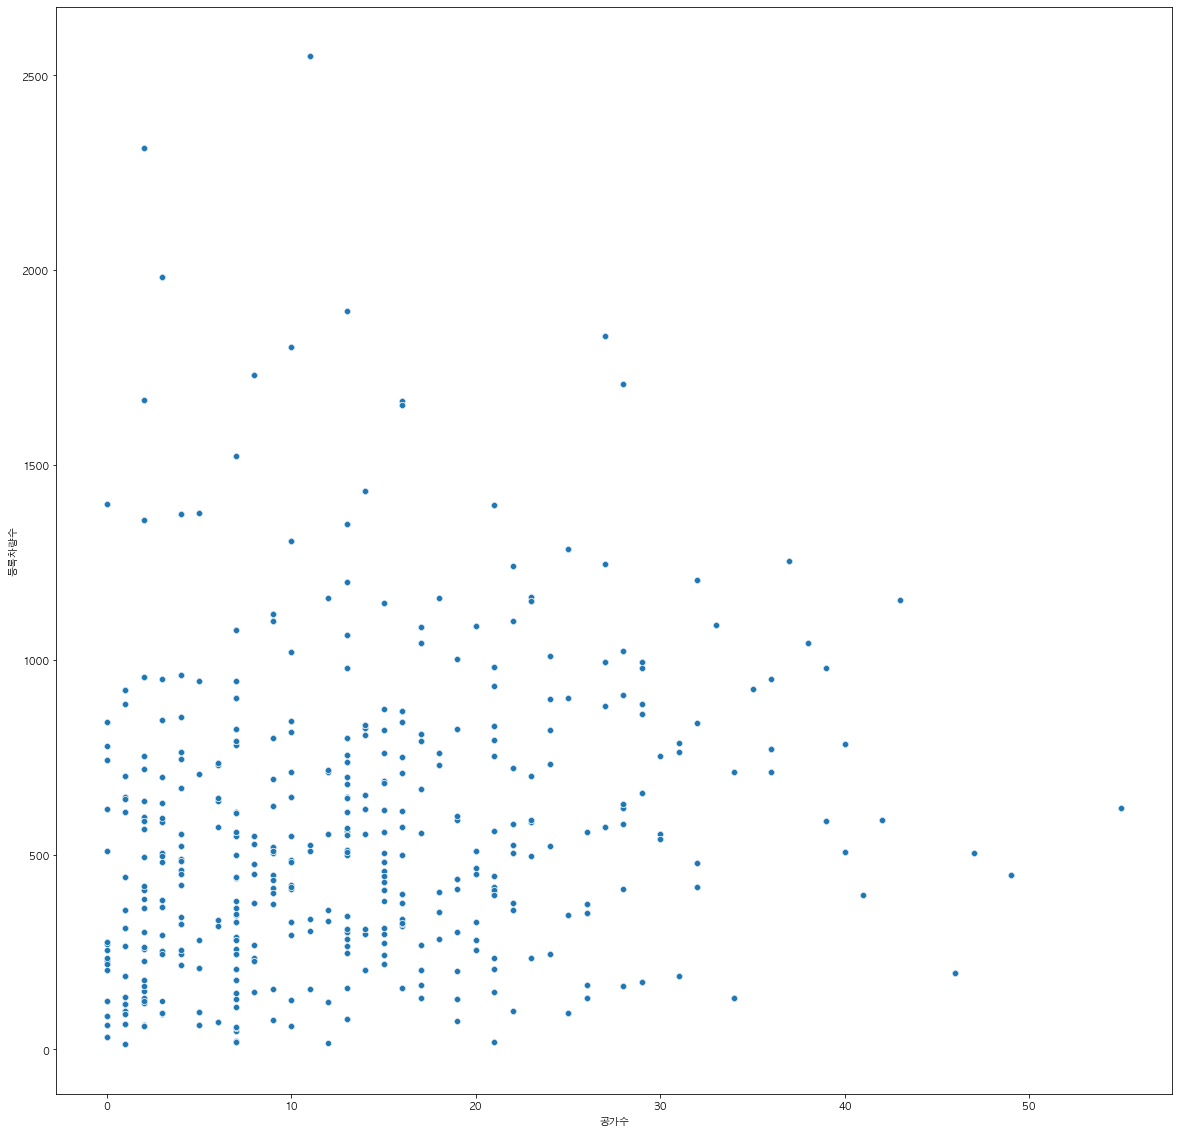

In [135]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['공가수'], y = final['등록차량수'])

<AxesSubplot:xlabel='신분', ylabel='등록차량수'>

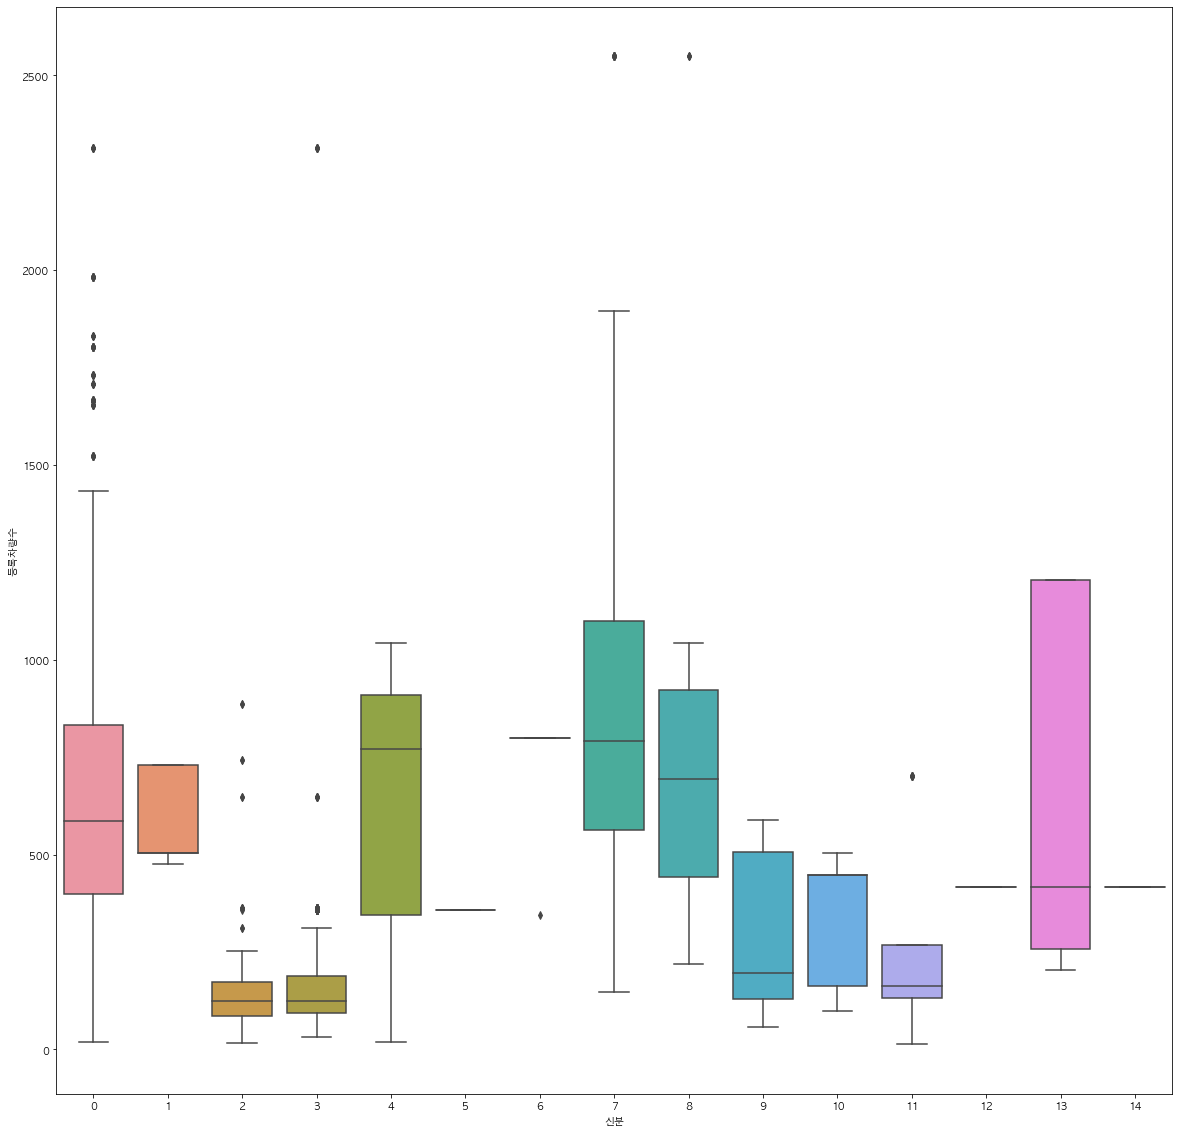

In [136]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = final['신분'], y = final['등록차량수'])

<AxesSubplot:xlabel='임대보증금', ylabel='등록차량수'>

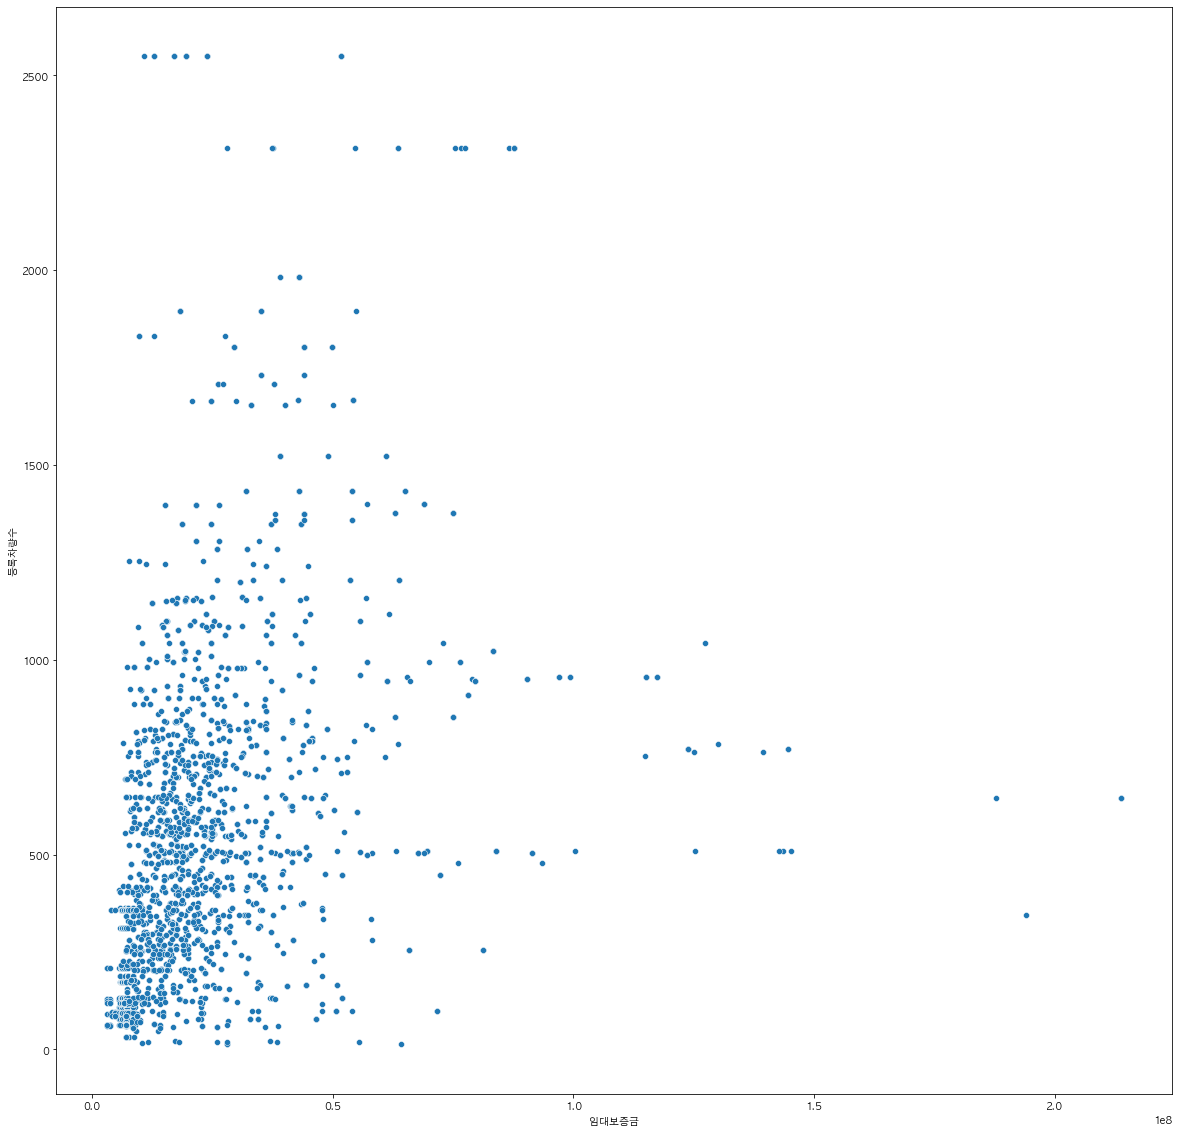

In [137]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['임대보증금'], y = final['등록차량수'])

<AxesSubplot:xlabel='임대료', ylabel='등록차량수'>

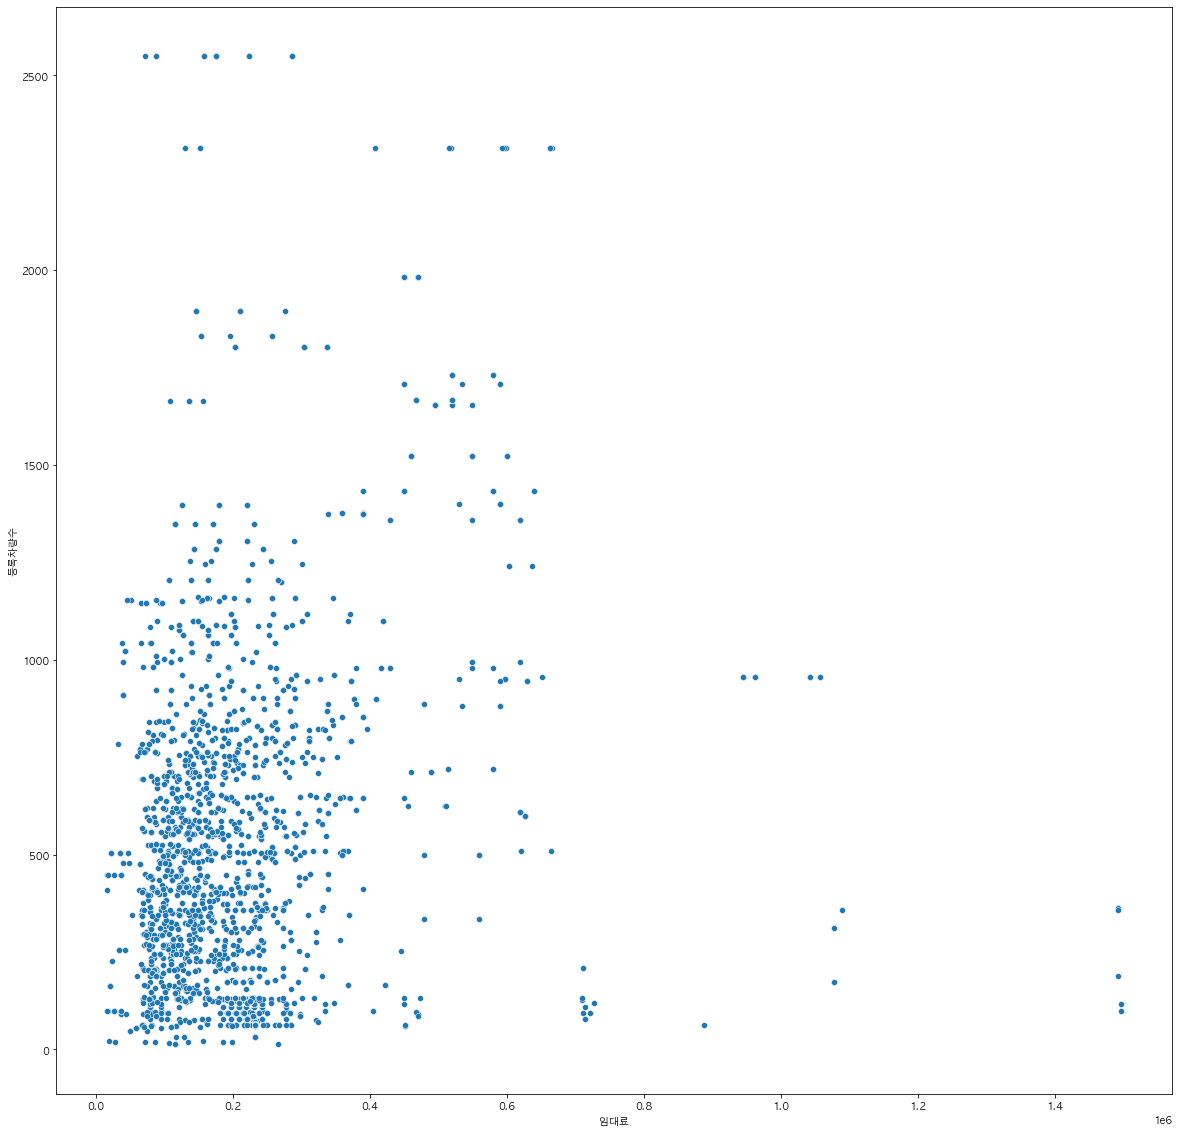

In [138]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['임대료'], y = final['등록차량수'])

<AxesSubplot:xlabel='지하철', ylabel='등록차량수'>

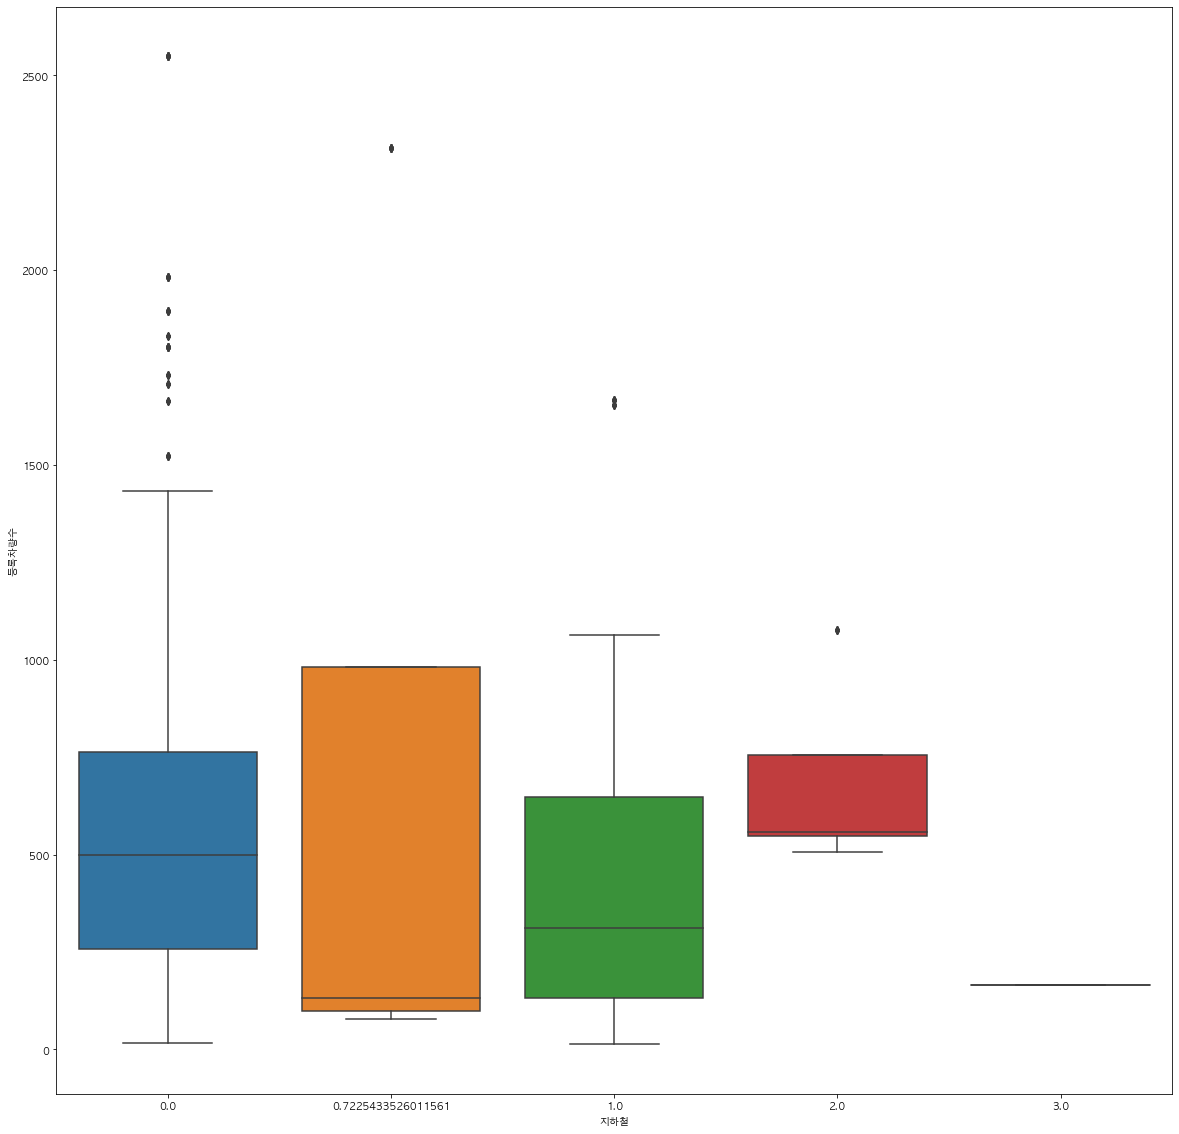

In [139]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = final['지하철'], y = final['등록차량수'])

<AxesSubplot:xlabel='버스', ylabel='등록차량수'>

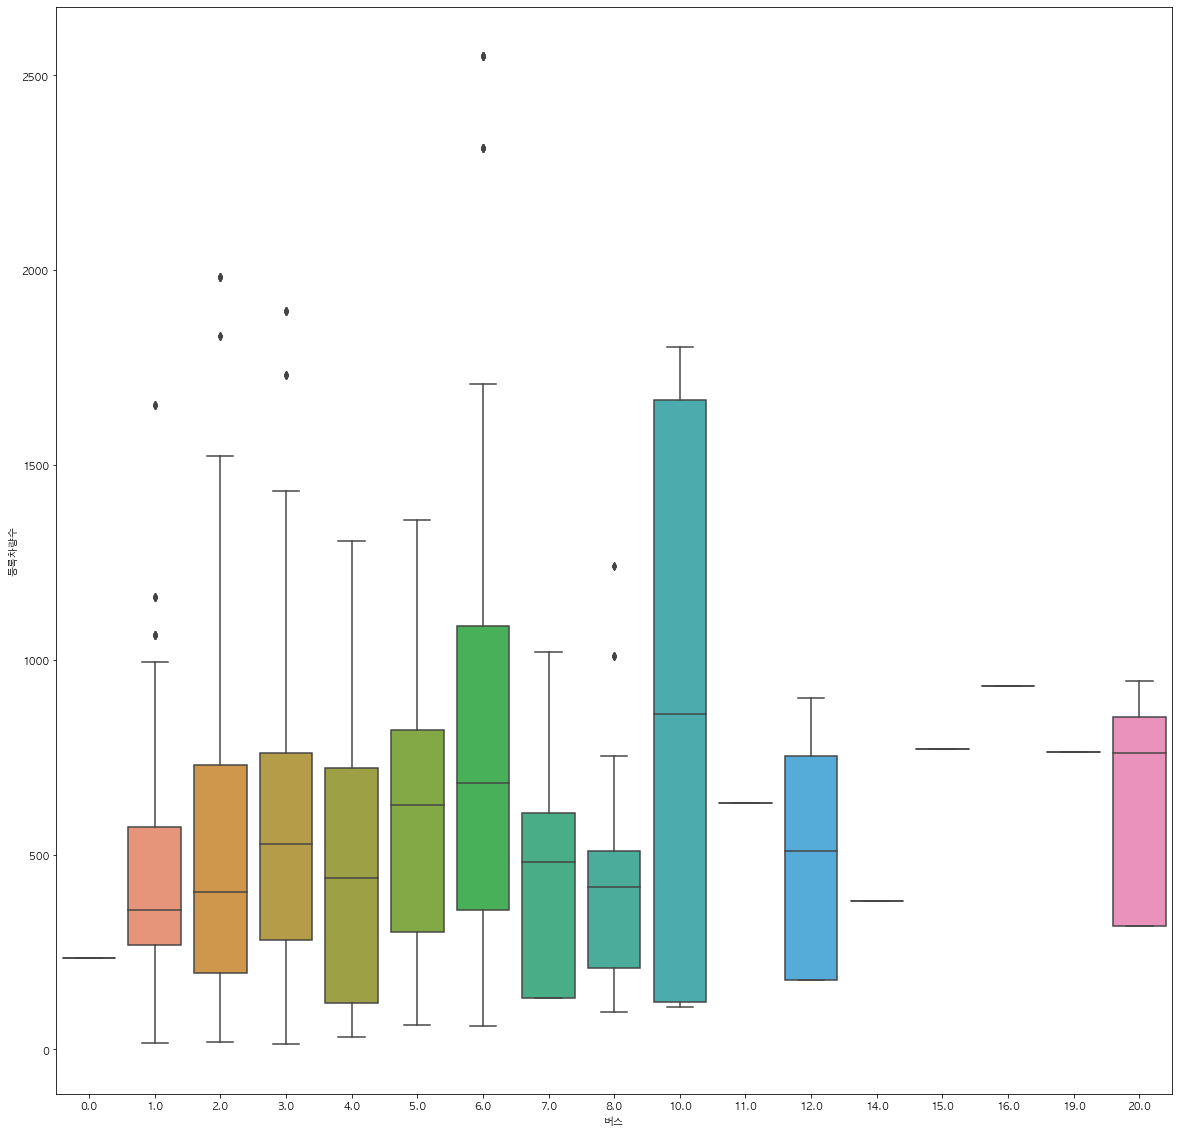

In [140]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = final['버스'], y = final['등록차량수'])

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

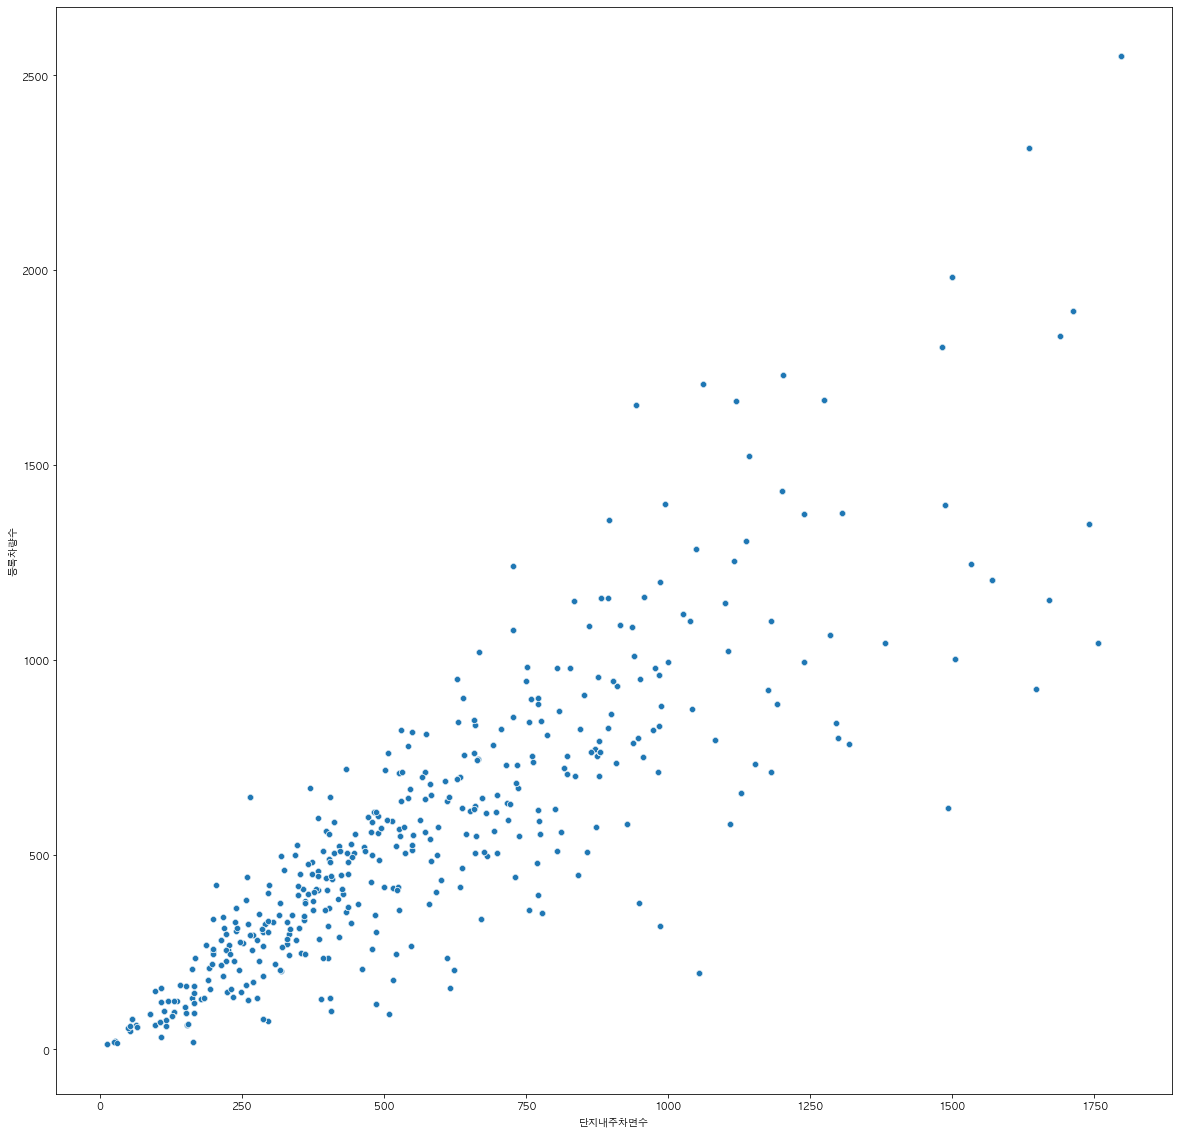

In [141]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = final['단지내주차면수'], y = final['등록차량수'])

In [ ]:
# features distribution boxplot 
# plt.style.use('ggplot')
fig, axes = plt.subplots(2, 7, figsize = (20, 20))
fig.suptitle('features distribution', fontsize = 40)

column_idx = 0
for i in range(2):
  for j in range(7):
    sns.boxplot(x = data['target'], y = data[var_list[column_idx]], hue = data['target'], notch = True, width = 0.3, ax = axes[i][j]).set_title(var_list[column_idx], fontsize = 15)
    axes[i][j].set_xlabel('')
    axes[i][j].set_ylabel('')
    column_idx +=1
plt.show();
# plt.savefig('image2.png', facecolor='white')

In [142]:
from sklearn.preprocessing import RobustScaler

In [143]:
robust = RobustScaler()

In [145]:
robust.fit(final)

RobustScaler()

In [148]:
features = final.columns

In [161]:
data = robust.transform(final)

In [163]:
scaled_final = pd.DataFrame(columns=features, data=data)

In [165]:
scaled_final.head(5)

단지코드      총세대수  임대건물구분        지역  공급유형  전용면적  전용면적별세대수    공가수   신분  \
0 -0.734783 -0.389171     0.0 -0.666667   0.0 -0.25  1.687500  0.375  0.0   
1 -0.734783 -0.389171     0.0 -0.666667   0.0  0.00  0.000000  0.375  0.0   
2 -0.734783 -0.389171     0.0 -0.666667   0.0  0.00 -0.312500  0.375  0.0   
3 -0.734783 -0.389171     0.0 -0.666667   0.0  0.50 -0.171875  0.375  0.0   
4 -0.734783 -0.389171     0.0 -0.666667   0.0  0.50 -0.320312  0.375  0.0   

      임대보증금       임대료  지하철   버스   단지내주차면수     등록차량수  
0 -0.445442 -0.884697  0.0  0.0  0.231776 -0.496377  
1 -0.259586 -0.679216  0.0  0.0  0.231776 -0.496377  
2 -0.259586 -0.679216  0.0  0.0  0.231776 -0.496377  
3  0.050229 -0.317098  0.0  0.0  0.231776 -0.496377  
4  0.050229 -0.317098  0.0  0.0  0.231776 -0.496377

In [ ]:
import 